# Airline Satisfaction Analysis

Author: Mitra Rezvany

Course Project, UC Irvine, Math 10, S22

## Introduction

In this project, I will be using the airline satisfaction dataset imported from Kaggle. The dataset displays customer satisfaction scores from 120,000+ airline passengers, including details about the passenger, their type of travel, and their evaluation of different factors like cleanliness, comfort, and overall experience. The accompanying data_dictionary dataset defines each of these additional variables. 

We will start by cleaning the datset using pandas and exploring its factors/variables using plotly and seaborn charts. Then, we will explore if the passenger's age and the distance their flight travels can predict their satisfaction by using scikit learn's Logistic Regression. Furthermore, we will use K-Nearest Neighbors Classifier to predict the satisfaction of passengers using factors regarding flight delays from the dataset. We'll display these findings using interactive altair charts.

## Main portion of the project

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

### Import the Data

In [2]:
df = pd.read_csv("airline_satisfaction.csv")
data_dict = pd.read_csv("data_dictionary.csv")
df

ID  Gender  Age Customer Type Type of Travel         Class  \
0            1    Male   48    First-time       Business      Business   
1            2  Female   35     Returning       Business      Business   
2            3    Male   41     Returning       Business      Business   
3            4    Male   50     Returning       Business      Business   
4            5  Female   49     Returning       Business      Business   
...        ...     ...  ...           ...            ...           ...   
129875  129876    Male   28     Returning       Personal  Economy Plus   
129876  129877    Male   41     Returning       Personal  Economy Plus   
129877  129878    Male   42     Returning       Personal  Economy Plus   
129878  129879    Male   50     Returning       Personal  Economy Plus   
129879  129880  Female   20     Returning       Personal  Economy Plus   

        Flight Distance  Departure Delay  Arrival Delay  \
0                   821                2            5.0   
1                   821               26           39.0   
2                   853                0            0.0   
3                  1905                0            0.0   
4                  3470                0            1.0   
...                 ...              ...            ...   
129875              447                2            3.0   
129876              308                0            0.0   
129877              337                6           14.0   
129878              337               31           22.0   
129879              337                0            0.0   

        Departure and Arrival Time Convenience  ...  On-board Service  \
0                                            3  ...                 3   
1                                            2  ...                 5   
2                                            4  ...                 3   
3                                            2  ...                 5   
4                                            3  ...                 3   
...                                        ...  ...               ...   
129875                                       4  ...                 5   
129876                                       5  ...                 5   
129877                                       5  ...                 3   
129878                                       4  ...                 4   
129879                                       1  ...                 4   

        Seat Comfort  Leg Room Service  Cleanliness  Food and Drink  \
0                  5                 2            5               5   
1                  4                 5            5               3   
2                  5                 3            5               5   
3                  5                 5            4               4   
4                  4                 4            5               4   
...              ...               ...          ...             ...   
129875             1                 4            4               4   
129876             2                 5            2               2   
129877             3                 4            3               3   
129878             4                 5            3               3   
129879             2                 4            2               2   

        In-flight Service  In-flight Wifi Service  In-flight Entertainment  \
0                       5                       3                        5   
1                       5                       2                        5   
2                       3                       4                        3   
3                       5                       2                        5   
4                       3                       3                        3   
...                   ...                     ...                      ...   
129875                  5                       4                        4   
129876                  4                       3           

In [3]:
data_dict

Field  \
0                                       ID   
1                                   Gender   
2                                      Age   
3                            Customer Type   
4                           Type of Travel   
5                                    Class   
6                          Flight Distance   
7                          Departure Delay   
8                            Arrival Delay   
9   Departure and Arrival Time Convenience   
10                  Ease of Online Booking   
11                        Check-in Service   
12                         Online Boarding   
13                           Gate Location   
14                        On-board Service   
15                            Seat Comfort   
16                        Leg Room Service   
17                             Cleanliness   
18                          Food and Drink   
19                       In-flight Service   
20                  In-flight Wifi Service   
21                 In-flight Entertainment   
22                        Baggage Handling   
23                            Satisfaction   

                                          Description  
0                         Unique passenger identifier  
1               Gender of the passenger (Female/Male)  
2                                Age of the passenger  
3     Type of airline customer (First-time/Returning)  
4           Purpose of the flight (Business/Personal)  
5   Travel class in the airplane for the passenger...  
6                            Flight distance in miles  
7                   Flight departure delay in minutes  
8                     Flight arrival delay in minutes  
9   Satisfaction level with the convenience of the...  
10  Satisfaction level with the online booking exp...  
11  Satisfaction level with the check-in service f...  
12  Satisfaction level with the online boarding ex...  
13  Satisfaction level with the gate location in t...  
14  Satisfaction level with the on-boarding servic...  
15  Satisfaction level with the comfort of the air...  
16  Satisfaction level with the leg room of the ai...  
17  Satisfaction level with the cleanliness of the...  
18  Satisfaction level with the food and drinks on...  
19  Satisfaction level with the in-flight service ...  
20  Satisfaction level with the in-flight Wifi ser...  
21  Satisfaction level with the in-flight entertai...  
22  Satisfaction level with the baggage handling f...  
23  Overall satisfaction level with the airline (S...

In [4]:
# info on datatypes and null entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [5]:
df.isna().any()

ID                                        False
Gender                                    False
Age                                       False
Customer Type                             False
Type of Travel                            False
Class                                     False
Flight Distance                           False
Departure Delay                           False
Arrival Delay                              True
Departure and Arrival Time Convenience    False
Ease of Online Booking                    False
Check-in Service                          False
Online Boarding                           False
Gate Location                             False
On-board Service                          False
Seat Comfort                              False
Leg Room Service                          False
Cleanliness                               False
Food and Drink                            False
In-flight Service                         False
In-flight Wifi Service                  

Although this dataset is mostly clean, `df.isna().any()` points out that the "Arrival Delay" column contains missing values so we'll have to drop those from df before exploring the dataset further. We use `df.shape` to confirm this change in the dataset.

In [6]:
df.shape

(129880, 24)

In [7]:
df.dropna(inplace=True)

In [8]:
print(f"The new number of rows in this dataset is {df.shape[0]}")

The new number of rows in this dataset is 129487


The "ID" column in df seems irrelevant and part of Kaggle data assignment rather than being a column significant to this dataset so we'll remove it. 

In [9]:
df = df.drop("ID", axis=1)

In [10]:
df.head()

Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
0    Male   48    First-time       Business  Business              821   
1  Female   35     Returning       Business  Business              821   
2    Male   41     Returning       Business  Business              853   
3    Male   50     Returning       Business  Business             1905   
4  Female   49     Returning       Business  Business             3470   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                                       3   
1               26           39.0                                       2   
2                0            0.0                                       4   
3                0            0.0                                       2   
4                0            1.0                                       3   

   Ease of Online Booking  ...  On-board Service  Seat Comfort  \
0                       3  ...                 3             5   
1                       2  ...                 5             4   
2                       4  ...                 3             5   
3                       2  ...                 5             5   
4                       3  ...                 3             4   

   Leg Room Service  Cleanliness  Food and Drink  In-flight Service  \
0                 2            5               5                  5   
1                 5            5               3                  5   
2                 3            5               5                  3   
3                 5            4               4                  5   
4                 4            5               4                  3   

   In-flight Wifi Service  In-flight Entertainment  Baggage Handling  \
0                       3                        5                 5   
1                       2                        5                 5   
2                       4                        3                 3   
3                       2                        5                 5   
4                       3                        3                 3   

              Satisfaction  
0  Neutral or Dissatisfied  
1                Satisfied  
2                Satisfied  
3                Satisfied  
4                Satisfied  

[5 rows x 23 columns]

### Visualization of Variables

##### Numerical Variables: Matplotlib and Seaborn Graphics 

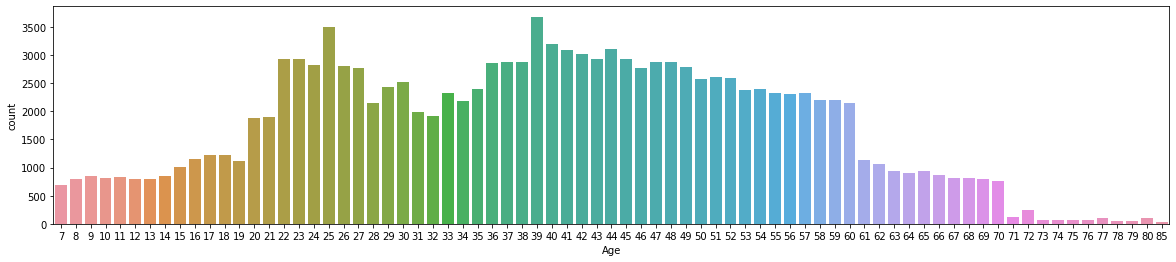

In [11]:
# When displaying the count of ages of passengers, the ticks on the x-axis overlap. 
# To avoid this, we change the figure size to 20in wide by 4in high
plt.figure(figsize=(20,4))
sns.countplot(x="Age", data=df)
plt.show()

In [12]:
# Statistics of Numerical Variables
df.describe()

Age  Flight Distance  Departure Delay  Arrival Delay  \
count  129487.000000    129487.000000    129487.000000  129487.000000   
mean       39.428761      1190.210662        14.643385      15.091129   
std        15.117597       997.560954        37.932867      38.465650   
min         7.000000        31.000000         0.000000       0.000000   
25%        27.000000       414.000000         0.000000       0.000000   
50%        40.000000       844.000000         0.000000       0.000000   
75%        51.000000      1744.000000        12.000000      13.000000   
max        85.000000      4983.000000      1592.000000    1584.000000   

       Departure and Arrival Time Convenience  Ease of Online Booking  \
count                           129487.000000           129487.000000   
mean                                 3.057349                2.756786   
std                                  1.526787                1.401662   
min                                  0.000000                0.000000   
25%                                  2.000000                2.000000   
50%                                  3.000000                3.000000   
75%                                  4.000000                4.000000   
max                                  5.000000                5.000000   

       Check-in Service  Online Boarding  Gate Location  On-board Service  \
count     129487.000000    129487.000000  129487.000000     129487.000000   
mean           3.306239         3.252720       2.976909          3.383204   
std            1.266146         1.350651       1.278506          1.287032   
min            0.000000         0.000000       0.000000          0.000000   
25%            3.000000         2.000000       2.000000          2.000000   
50%            3.000000         3.000000       3.000000          4.000000   
75%            4.000000         4.000000       4.000000          4.000000   
max            5.000000         5.000000       5.000000          5.000000   

        Seat Comfort  Leg Room Service    Cleanliness  Food and Drink  \
count  129487.000000     129487.000000  129487.000000   129487.000000   
mean        3.441589          3.351078       3.286222        3.204685   
std         1.319168          1.316132       1.313624        1.329905   
min         0.000000          0.000000       0.000000        0.000000   
25%         2.000000          2.000000       2.000000        2.000000   
50%         4.000000          4.000000       3.000000        3.000000   
75%         5.000000          4.000000       4.000000        4.000000   
max         5.000000          5.000000       5.000000        5.000000   

       In-flight Service  In-flight Wifi Service  In-flight Entertainment  \
count      129487.000000           129487.000000            129487.000000   
mean            3.642373                2.728544                 3.358067   
std             1.176614                1.329235                 1.334149   
min             0.000000                0.000000                 0.000000   
25%             3.000000                2.000000                 2.000000   
50%             4.000000                3.000000                 4.000000   
75%             5.000000                4.000000                 4.000000   
max             5.000000                5.000000                 5.000000   

       Baggage Handling  
count     129487.000000  
mean           3.631886  
std            1.180082  
min            1.000000  
25%            3.000000  
50%            4.000000  
75%            5.000000  
max            5.000000

The most common age of the passengers is 39, as shown by the peak of the graph above. `df.desrcibe()` confirms this by informing us that the mean of the "Age" column is  39.4.

##### Categorical Variables 

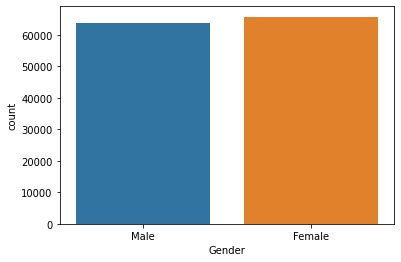

In [13]:
chart = sns.countplot(x="Gender", data=df)

The genders of the passengers are pretty evenly distributed.

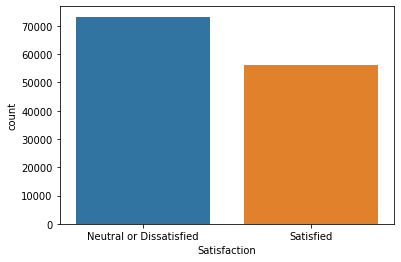

In [14]:
chart = sns.countplot(x="Satisfaction", data=df)

More people report being generally Neutral or Dissatsified on flights, however, there is not too large of a discrepancy.

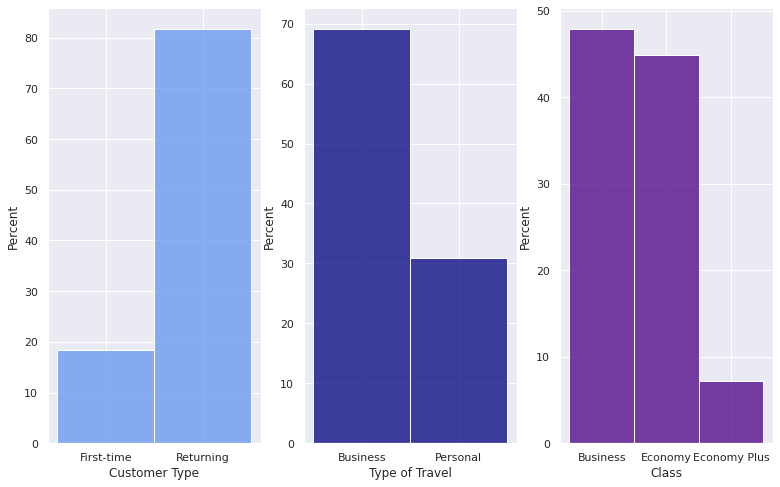

In [15]:
sns.set(rc={'figure.figsize':(13, 8)})
fig, ax = plt.subplots(1,3)
sns.histplot(x="Customer Type", data=df, stat="percent", color="cornflowerblue", ax=ax[0])
sns.histplot(x="Type of Travel", data=df, stat="percent", color="navy", ax=ax[1])
sns.histplot(x="Class", data=df, stat="percent", color="indigo", ax=ax[2])
fig.show()

These histograms shows that the majority of passengers are returning members of this specific airline's flights, traveling for business purposes, and are mostly split between the Business and Economy classes.

### Logistic Regression 

Use scikit learn's Logistic Regression to attempt to predict Satisfaction using Age and Flight Distance.

As altair cannot chart data with more than 5000 rows, we will take a sample of 5000 rows from the available 129487 rows in df and make it into a new dataframe called df1. We will then use this sample data while performing machine learning techniques. 

In [16]:
df1 = df.sample(5000)
df1

Gender  Age Customer Type Type of Travel         Class  \
26841   Female   61     Returning       Business       Economy   
126240    Male   23    First-time       Business       Economy   
35492   Female   67     Returning       Personal       Economy   
53512   Female   18     Returning       Personal       Economy   
95259     Male   41     Returning       Personal       Economy   
...        ...  ...           ...            ...           ...   
10577   Female   40     Returning       Business      Business   
74543   Female    8     Returning       Business      Business   
12651     Male   45    First-time       Business  Economy Plus   
9821      Male   21    First-time       Business      Business   
96877   Female   44     Returning       Personal       Economy   

        Flight Distance  Departure Delay  Arrival Delay  \
26841               224                0            4.0   
126240              590                2           19.0   
35492               950                0            0.0   
53512              2358                9            0.0   
95259               239               14           41.0   
...                 ...              ...            ...   
10577               458                0            5.0   
74543              1188                6            0.0   
12651               844                4            0.0   
9821                451               22           38.0   
96877               849               45           44.0   

        Departure and Arrival Time Convenience  Ease of Online Booking  ...  \
26841                                        3                       3  ...   
126240                                       4                       3  ...   
35492                                        1                       2  ...   
53512                                        5                       3  ...   
95259                                        5                       0  ...   
...                                        ...                     ...  ...   
10577                                        5                       5  ...   
74543                                        2                       2  ...   
12651                                        3                       3  ...   
9821                                         5                       4  ...   
96877                                        4                       2  ...   

        On-board Service  Seat Comfort  Leg Room Service  Cleanliness  \
26841                  3             4                 2            1   
126240                 1             3                 1            3   
35492                  3             4                 2            3   
53512                  3             2                 5            2   
95259                  4             4                 4            4   
...                  ...           ...               ...          ...   
10577                  5             5                 5            5   
74543                  1             4                 1            4   
12651                  1             2                 4            2   
9821                   5             5                 2            5   
96877                  1             4                 2            5   

        Food and Drink  In-flight Service  In-flight Wifi Service  \
26841                1                  3                       2   
126240               3                  4                       3   
35492                1                  3                       2   
53512                2                  4                       3   
95259                4                  3                       4   
...                ...                ...                     ...   
10577                3                  5                       5   
74543                4                  4                       4   
12651                2                  1                  

In [58]:
alt.Chart(df1).mark_circle().encode(
    x = "Age",
    y = "Flight Distance",
    color = "Satisfaction",
    tooltip = ["Age", "Flight Distance"]
)

alt.Chart(...)

In [18]:
no_corr = df[["Age", "Flight Distance"]]
no_corr.corr()

Age  Flight Distance
Age              1.000000         0.099863
Flight Distance  0.099863         1.000000

The graph above shows that there is no correlation between Age and Flight Distance, implying that they are not good factors to predict passenger's general satisfaction on the flight together. The table above also indicates this, as the correlation between Age and Flight Distance is extremley low (about 0.1). We will confirm this by checking how the accuracy of prediction using these factors by performing logistic regression and splitting the data is weak. 

In [19]:
cols = ["Age", "Flight Distance"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df1[cols], df1["Satisfaction"], test_size=0.2, random_state=0)

In [21]:
print(f"The shape of this dataset using Train is {X_train.shape}")

The shape of this dataset using Train is (4000, 2)


In [22]:
clf = LogisticRegression()

In [23]:
clf.fit(X_train, y_train)

LogisticRegression()

In [24]:
df1["pred"] = clf.predict(df1[cols])

In [25]:
clf.score(X_test, y_test)

0.678

In [26]:
clf.score(X_train, y_train)

0.67

We were correct 64% of the time. Since the accuracy is so low, this is a sign that these are not the best variables to use when predicting the general satifaction of passengers, as their lack of correlation hinted at, and that we should be looking into other factors from the datset instead. 

### KNeigborsClassifier 

Use KNeighborClassifier to predict Satisfaction using Departure Delay and Arrival Delay.

In [27]:
check_corr = df[["Age", "Flight Distance", "Departure Delay", "Arrival Delay"]]
check_corr.corr()

Age  Flight Distance  Departure Delay  Arrival Delay
Age              1.000000         0.099863        -0.009263      -0.011248
Flight Distance  0.099863         1.000000         0.001992      -0.001935
Departure Delay -0.009263         0.001992         1.000000       0.965291
Arrival Delay   -0.011248        -0.001935         0.965291       1.000000

The table above confirms that "Departure Delay" and "Arrival Delay" are the two numerical columns with the strongest correlation (about 0.97). Therefore, we can proceed with using them to predict the general satisfaction of passengers. 

In [28]:
k_clf = KNeighborsClassifier(n_neighbors=30)

In [29]:
delay = ["Departure Delay", "Arrival Delay"]

In [51]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df1[delay], df1["Satisfaction"], test_size=0.4, random_state=0)

In [52]:
k_clf.fit(X_train2,y_train2)

KNeighborsClassifier(n_neighbors=49)

In [53]:
df1["Prediction"] = k_clf.predict(df1[delay])

### Altair

Use altair to display differences in graphics when predictions are made using KMeansClassifier.

In [54]:
c1 = alt.Chart(df1).mark_circle().encode( 
    x=alt.X("Departure Delay", scale=alt.Scale(zero=False)), 
    y=alt.Y("Arrival Delay", scale=alt.Scale(zero=False)), 
    color="Satisfaction",
    tooltip=["Departure Delay", "Arrival Delay"]
)


c2 = alt.Chart(df1).mark_circle().encode( 
    x=alt.X("Departure Delay", scale=alt.Scale(zero=False)), 
    y=alt.Y("Arrival Delay", scale=alt.Scale(zero=False)), 
    color="Prediction",
    tooltip=["Departure Delay", "Arrival Delay"]
)

In [55]:
c1|c2

alt.HConcatChart(...)

The graph on the left shows the actual data for the two types of delays, while the graph of the right shows the predicted data. Both scatterplots shows the positive correlation between departure delay and arrival delay. The predicted data scatterplot is almost entirely made up of points signifying passengers being neutral or dissatisffied, with only a small portion of satisfied passengers being clustered where the x and y axes cross, essentially where there is the lowest arrival and departure delay. This makes sense as people are more pleased with the service of an airline if there are little to no delays for their flight. 

Finally, we will use a for loop and log_loss to find the number of neighbors in KNeighborsClassifier that will give us the best fit graph.

In [57]:
for k in range(6,50):
    k_clf = KNeighborsClassifier(n_neighbors=k)
    k_clf.fit(X_train, y_train)
    loss = log_loss(y_test, k_clf.predict_proba(X_test))
    print(k, loss)

6 1.4111251863307583
7 0.899857480556819
8 0.8333009710295111
9 0.8082307400551902
10 0.7286232491501456
11 0.7390070110585765
12 0.8284365394849427
13 0.7237233569791663
14 0.730086975826891
15 0.7361681146213711
16 0.7197551478181212
17 0.7227131448999714
18 0.7085926216493472
19 0.7132651754887945
20 0.7206286495101923
21 0.725462268515407
22 0.7138777971257559
23 0.705742401354357
24 0.6983860085109066
25 0.692945073258819
26 0.6964982325491654
27 0.6913277554801867
28 0.6878890119506471
29 0.689062148796085
30 0.6870316735759631
31 0.6903532411680618
32 0.6869070903665746
33 0.6875744312757628
34 0.6891576502112906
35 0.6878724176558395
36 0.6844915334619025
37 0.6836763884426055
38 0.6851704868072505
39 0.6829297815214472
40 0.6818537677111327
41 0.6815409729458989
42 0.6804247640209738
43 0.6812981984794128
44 0.6827787650141771
45 0.6819311980858049
46 0.6807964717982479
47 0.6809733398618737
48 0.6812360389881454
49 0.6813934053853075


Log Loss is the negative average of the log of corrected predicted probabilities for each instance. The values above show that log_loss becomes smaller as k grows larger. Also, overfitting is more likely to occur with smaller values of n_neighbors. Thus, we will have the best fitted graph when we set k to 42, where log_loss is the smallest at 0.6804. (This may change if notebook is run again, but k should be between 34 and 49 for best fit graph)

## Summary

After performing both logistic regression and KMeansNeighbor machine learning techniques, our results showed that the numerical variables we examined (specifically Age and Flight Distance) were not able to predict general "Satsifaction" with great accuracy. However, we can conclude that delays do have an impact on the satisfaction of passengers, as the predictions showed greater dissatisfied passengers when there were more delays. 

If we want to continue working with this dataset, we can try to convert the relevant categorical factors, such as Type of Travel and Class, into Boolean values and then check to see if they can better predict the general satisfaction of passengers for this airline. Another interesting machine learning idea is to try using linear regression and the delay times to predict other numerical data like flight distance.

## References

Where the dataset was found: [Kaggle](https://www.kaggle.com/datasets/mysarahmadbhat/airline-passenger-satisfaction)

The configuration of the side by side historgrams in the visualization of relevant variables section was adapted from [Airline Kaggle Notebook](https://www.kaggle.com/code/megan3/airline-passenger-satisfaction-expanded-eda)

K-Nearest Neighbors Guide: [Winter Quarter Course Notes](https://christopherdavisuci.github.io/UCI-Math-10-W22/Week6/Week6-Wednesday.html)

I decided to use log_loss instead of test error with KNeighborsClassifier through [McDonald's Menu Analysis](https://christopherdavisuci.github.io/UCI-Math-10-W22/Proj/StudentProjects/JennyTran.html)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f6a2bec2-e88e-41c7-9cea-e602f6f7458b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>